# Assignment 5

## k-means clustering

In [15]:
import matplotlib.pyplot as plt
import numpy as np

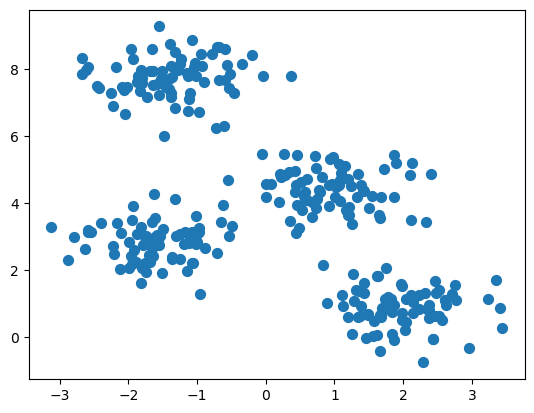

In [16]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

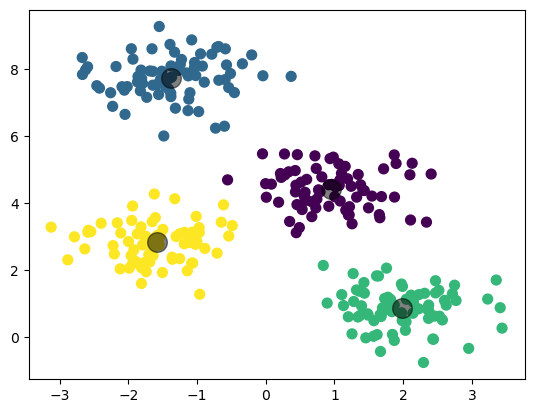

In [17]:
def find_clusters_kmeans(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]

    #########################################################################
    # TODO: Store randomly choosed cluster centers in the centers variable. #
    #########################################################################
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ******** #
    centers = X[i]

    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #


    while True:
        ###################################################################################
        # TODO:Implement a clustering algorithm. You MUST implement all of the following: #
        #      (1) Assign each training example X to the closest clustetr centers.        #
        #        - calculate the sum of squared errors.                                   #
        #        - Store the argmin of squared errors in the labels variable.             #
        #      (2) Calculate new cluster centers.                                         #
        #        - Store the updated centers in the new_centers variable.                 #
        #      (3) Check for covergence.                                                  #
        #        - Break the loop if the centers variable is the same as new_centers.     #
        #        - Ohterwise, updates the centers variable to be the same as new_centers. #
        ###################################################################################
        # ************* START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************* #
        labels = np.argmin(np.linalg.norm(X[:, None] - centers, axis=2), axis=1)
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers


        # ************** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************** #

    return centers, labels

centers, labels = find_clusters_kmeans(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Limitations of k-means

### Not optimally guaranteed and initialization
Under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics. However, it is best to note that, **although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution**.

The **initialization is important** and particularly bad initialization can sometimes lead to clearly sub-optimal clustering.

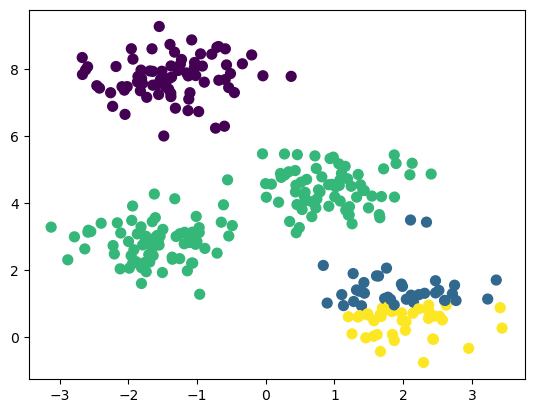

In [18]:
centers, labels = find_clusters_kmeans(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Number of clusters?

A common challenge with k-means is that you must tell it how many clusters you expect.
It cannot learn the number of clusters from the data.

If we force the k-means to look for 6 clusters instead of 4, it will come back with 6 but they may not be what we are looking for!

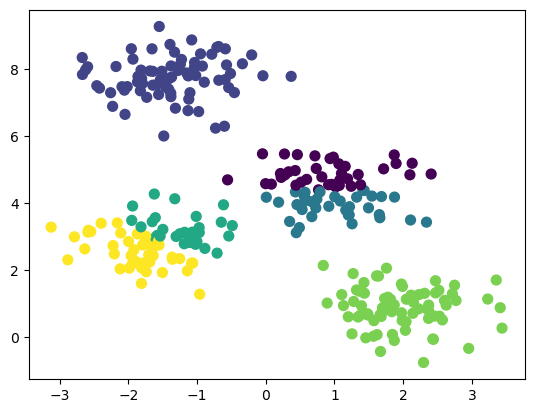

In [19]:
centers, labels = find_clusters_kmeans(X, 6)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Complicated datasets


k-means algorithm will often be ineffective if the clusters have complicated geometries. In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.

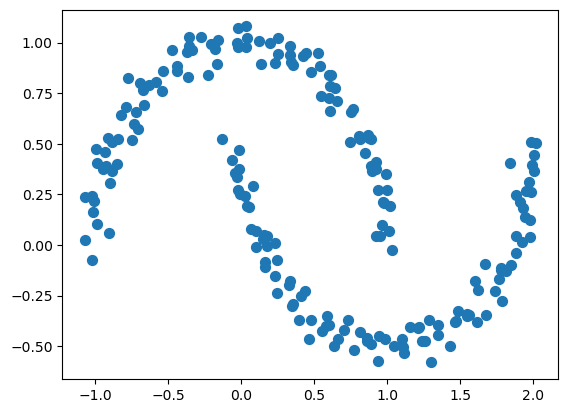

In [20]:
from sklearn.datasets import make_moons
Xmoon, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], s=50)

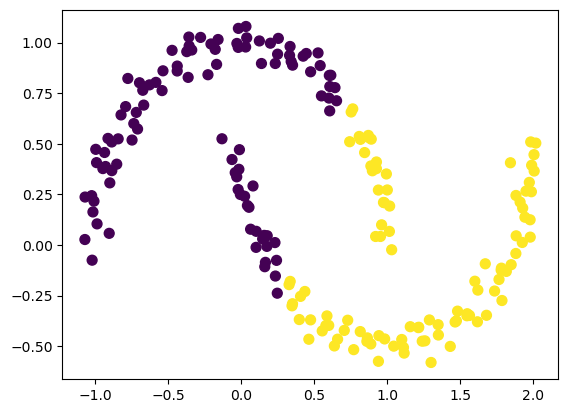

In [21]:
centers, labels = find_clusters_kmeans(Xmoon, 2, rseed=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=labels,
            s=50, cmap='viridis');

### Fails for non-circular blobs of data

In particular, the non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations.

Gaussian mixture models (GMMs), can be viewed as an extension of the ideas behind k-means, but can also be a powerful tool for estimation beyond simple clustering.

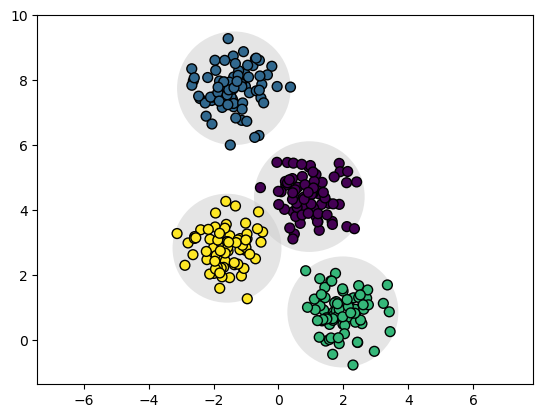

In [22]:
from scipy.spatial.distance import cdist
def plot_kmeans(X, n_clusters=4, rseed=0, ax=None):
    centers, labels = find_clusters_kmeans(X, 4, rseed=2)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k',zorder=2)

    # plot the representation of the KMeans model
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

plot_kmeans(X)

There appears to be a very slight overlap between the two middle clusters, such that we might not have complete confidence in the cluster assigment of points between them. Unfortunately, the **k-means model has no intrinsic measure of probability or uncertainty** of cluster assignments.

For k-means these cluster models must be circular. k-means has **no built-in way of accounting for oblong or elliptical clusters**. So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled.

k-means is not flexible enough to account for this, and tries to force-fit the data into four circular clusters. This results in a mixing of cluster assignments where the resulting circles overlap.

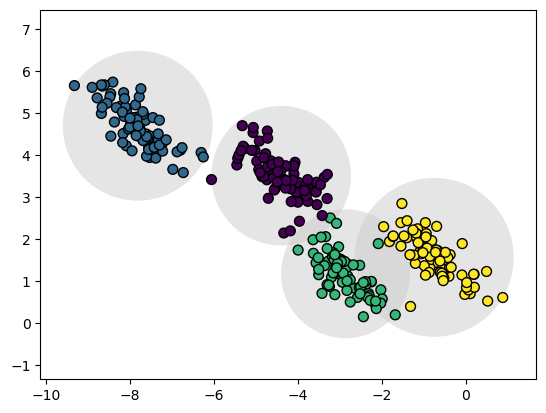

In [23]:
rng = np.random.RandomState(4)
X_stretched = np.dot(X, rng.randn(2, 2))
plot_kmeans(X_stretched)

## Gaussian Mixture Models (GMM)


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal as N # ~ Gaussian distribution

def find_gmm(X, n_clusters, max_iter=100):

    rng = np.random.RandomState(0)
    i = rng.permutation(X.shape[0])[:n_clusters]

    #########################################################################
    # TODO: Store randomly choosed points in the means variable.            #
    #########################################################################
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ******** #


    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #

    covariances = [np.cov(X.T) for _ in range(n_clusters)]
    p_z = np.full(n_clusters, 1.0 / n_clusters)


    for _ in range(max_iter):
    #########################################################################################
    # TODO:Implement a GMM. You MUST implement all of the following:                        #
    #      (1) Implement the E-step of the algorithm.                                       #
    #        - calculate likelihoods (use 'N.pdf(X, mean= , cov= ).                         #
    #        - calculate responsibilities and store in the responsibilities variable.       #
    #      (2) Implement the M-step of the algorithm.                                       #
    #        - update the p_z variable.                                                     #
    #        - update the means variable.                                                   #
    #        - update the covariances variable.                                             #
    #      (3) After the loop, store the argmin of responsibilities in the labels variable. #
    #########################################################################################
    # **************** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) **************** #
        

    # ************** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************** #

    return labels, means, covariances, p_z

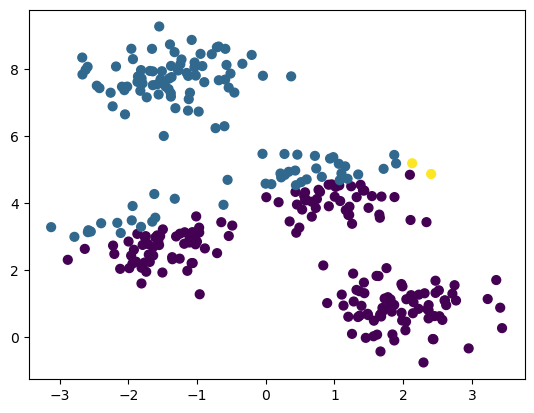

In [25]:
labels, means, covariances, weights = find_gmm(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

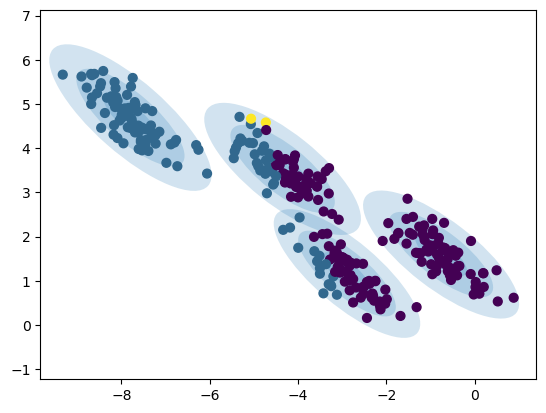

In [26]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(X, n_clusters, label=True, ax=None):
    ax = ax or plt.gca()
    labels, means, covariances, weights = find_gmm(X, n_clusters)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / max(weights)
    for pos, covar, w in zip(means, covariances, weights):
        draw_ellipse(pos, covar, alpha=w * w_factor)

plot_gmm(X_stretched, 4)

### GMM as density estimation and generative model algorithm

Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

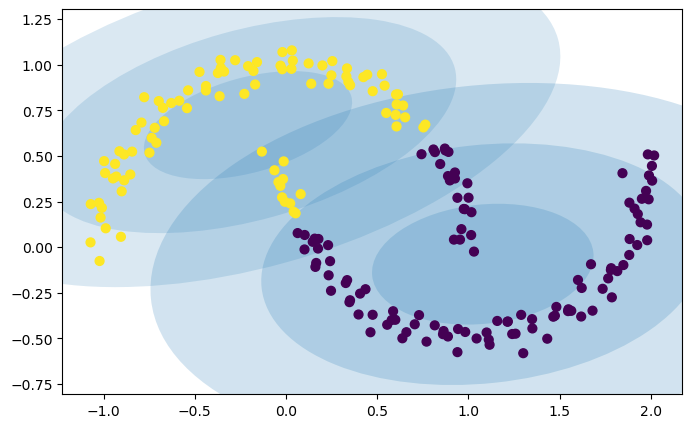

In [27]:
plt.figure(figsize=(8,5))
plot_gmm(Xmoon,2)

Here the mixture of 10 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input.

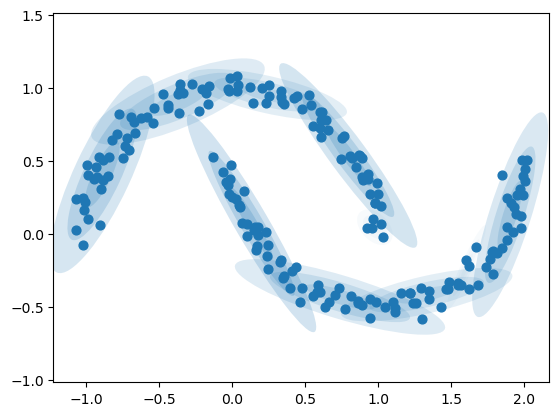

In [28]:
plot_gmm(Xmoon,10, label=False)